In [1]:
import os

In [28]:
from tqdm import tqdm_notebook as tqdm

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
from matplotlib import pyplot as plt
%matplotlib inline

In [130]:
import numpy as np
import pandas as pd

In [134]:
import json

In [25]:
import re
GROUPING_SPACE_REGEX = re.compile(r'([^\w]|[+])', re.UNICODE)
def simple_word_tokenize(text, _split=GROUPING_SPACE_REGEX.split):
    return [t for t in _split(text.lower()) if t and not t.isspace()]

In [26]:
import pymorphy2
m = pymorphy2.MorphAnalyzer()

In [27]:
def token_r(text):
    words = simple_word_tokenize(text)
    return [m.parse(x)[0].normal_form for x in words if len(x) >= 4]

In [2]:
os.listdir('/data/share/lab05data/')

['test_543.txt',
 'test_505.txt',
 'test_611.txt',
 'test_3281.txt',
 'test_2922.txt',
 'test_879.txt',
 'test_3801.txt',
 'test_2422.txt',
 'test_1688.txt',
 'test_25.txt',
 'test_1338.txt',
 'test_1647.txt',
 'test_1124.txt',
 'test_237.txt',
 'test_580.txt',
 'test_1479.txt',
 'test_2316.txt',
 'test_108.txt',
 'test_3553.txt',
 'test_2988.txt',
 'test_255.txt',
 'test_2863.txt',
 'test_3536.txt',
 'test_3769.txt',
 'test_653.txt',
 'test_1405.txt',
 'test_519.txt',
 'test_1370.txt',
 'test_2979.txt',
 'test_2559.txt',
 'test_3282.txt',
 'test_1009.txt',
 'test_3305.txt',
 'test_1780.txt',
 'test_3906.txt',
 'test_2118.txt',
 'test_2970.txt',
 'test_2930.txt',
 'test_3467.txt',
 'test_1282.txt',
 'test_3910.txt',
 'test_3259.txt',
 'test_2227.txt',
 'test_2218.txt',
 'test_684.txt',
 'test_3249.txt',
 'test_1832.txt',
 'test_1444.txt',
 'test_3183.txt',
 'test_3708.txt',
 'test_2114.txt',
 'test_3430.txt',
 'test_3201.txt',
 'test_833.txt',
 'test_2594.txt',
 'test_3240.txt',
 'test

In [18]:
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [97]:
# first extract 20 base vacancies
texts = []
for i in tqdm(range(1, 21)):
    with open(f'/data/share/lab05data/base_{i}.txt', 'rb') as fp:
        texts.append(BeautifulSoup(fp).text)

In [98]:
len(texts)

20

In [100]:
# ids of texts you need to classify
idxs = [2561, 514, 2570, 3085, 1040, 1046, 24, 3610, 3612, 859, 33, 945, 2087, 1885, 1580, 1074, 3639, 1593, 2485, 573, 63, 3649, 3139, 582, 2049, 1608, 1098, 1099, 2639, 3668, 1626, 607, 2656, 1121, 1635, 3178, 1644, 2158, 2159, 2238, 3699, 3700, 2682, 2173, 2174, 3203, 2692, 2184, 2187, 536, 3213, 3214, 3728, 3729, 658, 2195, 3222, 2199, 2200, 624, 672, 161, 1698, 3748, 711, 3239, 3244, 1710, 176, 3763, 1396, 1717, 695, 698, 1723, 1725, 702, 1215, 1217, 1320, 3267, 196, 710, 3783, 3272, 715, 2255, 724, 1758, 3808, 3300, 3818, 748, 3822, 751, 2288, 3180, 3317, 2806, 3831, 384, 623, 3030, 3842, 3850, 2316, 783, 2324, 1305, 2332, 1311, 1825, 292, 1831, 562, 812, 2863, 3376, 307, 820, 3551, 2361, 833, 2374, 2377, 1355, 3920, 337, 2386, 1367, 1308, 347, 861, 352, 3473, 3940, 870, 2921, 2924, 1524, 13, 2758, 372, 1909, 887, 888, 382, 1174, 897, 3137, 903, 1419, 579, 1006, 1937, 917, 406, 2456, 414, 2463, 3489, 668, 2981, 429, 2760, 1457, 3508, 3509, 1439, 2634, 3001, 3516, 445, 2379, 2496, 1697, 971, 972, 2510, 464, 2003, 1956, 3542, 2521, 2010, 1500, 2526, 479, 3041, 482, 2532, 485, 2023, 3564, 3566, 766, 2548, 3576, 3066, 1020]

In [101]:
# now extract test vacancies that I need to classify
for i in tqdm(idxs):
    with open(f'/data/share/lab05data/test_{i}.txt', 'rb') as fp:
        texts.append(BeautifulSoup(fp).text)

In [102]:
len(texts)

220

In [103]:
texts[0]

'Ищем прекрасного программиста 1С в дружный отдел сотрудников сферы IT с неутомительным режимом работы. У нас есть 1С 8.2, 8.3, бухгалтерия строительной организации, ЖКХ, ЗУП + самописные. Что надо делать: - доработать существующие конфигурации,- разработать новые конфигураций,- отчеты, базы данных...- осуществлять поддержку наших продвинутых пользователей Режим работы с 10 до 18 по вторникам и пятницам (СТРОГО!).  '

In [105]:
texts[21]

'Neemble - молодая компания, состоящая из опытных профессионалов. Ежедневно мы работаем над несколькими технологически сложными и от этого еще более интересными продуктами, которые уже этой весной начнут менять представление малого и среднего бизнеса об автоматизации процессов.   Обязанности:  Разработка приложений для платформы Android; Создание быстрых прототипов приложений; Участие в проектировании мобильных приложений; Оценка сложности реализаций функциональных и интерфейсных элементов приложений; Контроль качества реализации приложений.    Требования:  Разработка под Android от 3-х лет; Опыт управления командой разработчиков; Понимание принципов построения систем на базе Android и принципов построения современных приложений; Знание Android SDK (API lvl > 10); MVC, OOP и паттерны проектирования; Опыт коммерческой разработки мобильных приложений; Опыт интеграции с различными HTTP API.    Будет плюсом:  Jira / Git / Agile; Опыт с системой сборки Gradle; Опыт разработки и использовани

In [40]:
cv = CountVectorizer(tokenizer=token_r)

In [106]:
%time matrix = cv.fit_transform(texts).toarray()

CPU times: user 4.74 s, sys: 4 ms, total: 4.74 s
Wall time: 4.74 s


In [107]:
matrix.shape

(220, 3910)

In [108]:
matrix[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
cos_m = cosine_similarity(matrix)

In [110]:
cos_m.shape

(220, 220)

In [111]:
cos_m[0].argmin()

2

In [112]:
texts[cos_m[0].argmin()]

'NetCracker Technology Corp., a large software development company and one of the world’s most respected TOMS Solutions (Telecommunications Operations and Management Solutions) companies, has an opening for: \xa0 Technical ManagerResponsibilities: \xa0  Managing a team of 3-8 or more developers; Carrying out various development projects of the duration from 1 week up to several months through the full cycle starting from the requirements gathering and up to product implementation and documentation preparation; Participating customer implementation projects; Carrying out presales demonstration projects, resulting in presenting demonstrations basing on customer requirements.  Qualification:  High Technical Degree; Minimum of 3 years experience as a developer/lead developer; Minimum of 2 years technical management experience; Excellent knowledge of Java, J2EE; Very good technical English verbal/writing skills; Successful experience in managing IT projects; Excellent communication and team

In [113]:
cos_m[0, 20:].argmax()

172

In [114]:
tests = texts[20:]
tests[cos_m[0, 20:].argmax()]

'Команда Colvir Software Solutions насчитывает уже более 320 сотрудников, но задач гораздо больше, чем нас, поэтому мы постоянно растем и всегда рады талантливым и влюбленным в свою работу людям у нас в команде.Наша цель – современные комплексные решения для эффективного развития бизнеса клиентов. Приглашаем программиста для участия в проекте связанного с развитием софта для наших банков-клиентов. Основные обязанности сотрудника:  Разработка на Delphi и PL/SQL; Тестирование и внедрение своих разработок конечному пользователю; Короткое сопровождение клиента после внедрения разработки.  В своих сотрудниках мы хотим видеть:  Знания принципов объектно-ориентированного программирования; Опыт работы с Delphi либо опыт работы с PL/SQL (Oracle) не менее года; либо опыт работы с другими СУБД от 2-х лет; Опыт работы с бухгалтерским учетом; Способность к обучению и самообучению; Умение работать в команде.  Нашим сотрудникам мы предлагаем:  Стабильную работу над масштабным комплексным решением; Ра

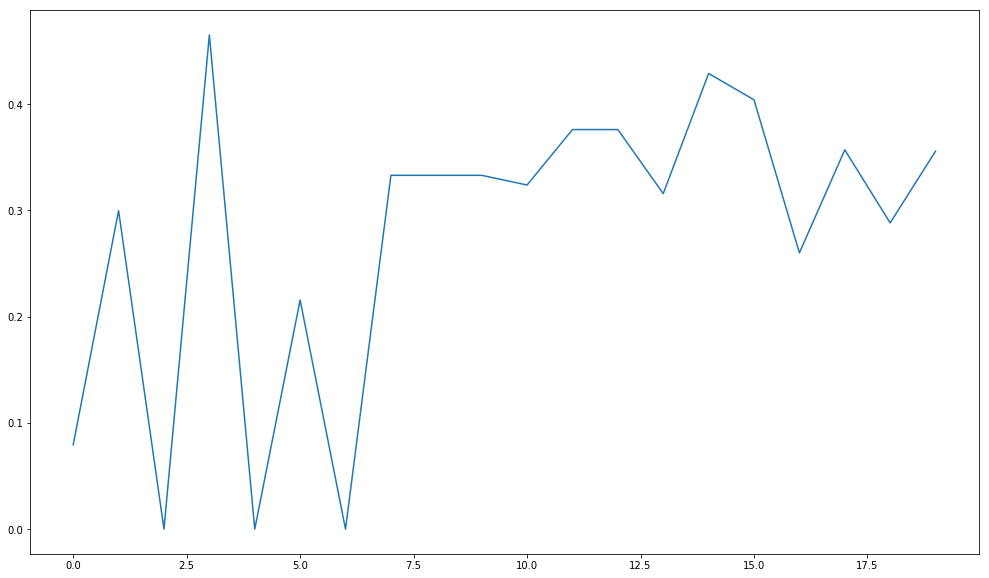

In [119]:
plt.figure(figsize=(17,10))
plt.plot(cos_m[21, :20])

In [125]:
# calculate sum of cosine metrics for each test sample
score = {}
for i in range(20, 220):
    score[i] = np.sum(cos_m[i, :20])

In [126]:
score[20]

5.178800172667906

In [127]:
# let's calulate threshold as mean of scores for test samples
t = np.array(list(score.values())).mean()
t

4.0220477163774095

In [128]:
result = {'defined': [], 'other': []}
for i, idx in tqdm(enumerate(idxs)):
    if score[i+20] > t:
        result['defined'].append(idx)
    else:
        result['other'].append(idx)
result

{'defined': [2561,
  514,
  2570,
  3085,
  1040,
  1046,
  24,
  3612,
  2087,
  1074,
  3649,
  3139,
  2049,
  1608,
  1098,
  1099,
  2639,
  607,
  2656,
  1121,
  1644,
  2158,
  2159,
  2238,
  3699,
  3700,
  2173,
  3203,
  2692,
  2184,
  536,
  3213,
  3214,
  3728,
  2195,
  3222,
  2199,
  672,
  161,
  1698,
  3748,
  3239,
  3244,
  176,
  3763,
  1723,
  1725,
  1215,
  3267,
  710,
  3272,
  715,
  1758,
  3808,
  3818,
  3822,
  2288,
  3317,
  3030,
  3842,
  2316,
  783,
  2324,
  2332,
  1311,
  1825,
  292,
  2863,
  3376,
  833,
  1355,
  1367,
  861,
  3940,
  2921,
  2924,
  2758,
  372,
  382,
  1937,
  429,
  1457,
  3516,
  445,
  2379,
  971,
  972,
  2003,
  3542,
  2521,
  479,
  2532,
  485,
  2023,
  3566,
  2548,
  3066],
 'other': [3610,
  859,
  33,
  945,
  1885,
  1580,
  3639,
  1593,
  2485,
  573,
  63,
  582,
  3668,
  1626,
  1635,
  3178,
  2682,
  2174,
  2187,
  3729,
  658,
  2200,
  624,
  711,
  1710,
  1396,
  1717,
  695,
  698,
  702,

In [135]:
# write result to json file
with open("data/home/sergey.zaytsev/lab05.json", "w") as f:
    json.dump(result, f)